# Linear Regression (Project 6)

In [444]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [445]:
data = pd.read_csv("RRCA_baseflow.csv")
data

,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed
0,710732,144,1086190,14476800,0.59,18.99,0.0,0.145161
1,710763,144,1086190,14476800,0.97,29.63,0.0,0.445161
2,710791,144,1086190,14476800,1.34,29.63,0.0,1.332203
3,710822,144,1086190,14476800,1.79,29.63,0.0,2.932203
4,710852,144,1086190,14476800,8.23,29.63,0.0,3.728689
...,...,...,...,...,...,...,...,...
15586,721810,98,721870,14387040,0.00,0.00,0.0,0.298500
15587,721841,98,721870,14387040,0.00,0.00,0.0,0.211475
15588,721871,98,721870,14387040,0.00,0.00,0.0,0.122951
15589,721902,98,721870,14387040,0.00,0.00,0.0,0.120000


#### Removing rows if they have NaN values

In [446]:
data = data.dropna()
data

,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed
0,710732,144,1086190,14476800,0.59,18.99,0.0,0.145161
1,710763,144,1086190,14476800,0.97,29.63,0.0,0.445161
2,710791,144,1086190,14476800,1.34,29.63,0.0,1.332203
3,710822,144,1086190,14476800,1.79,29.63,0.0,2.932203
4,710852,144,1086190,14476800,8.23,29.63,0.0,3.728689
...,...,...,...,...,...,...,...,...
15586,721810,98,721870,14387040,0.00,0.00,0.0,0.298500
15587,721841,98,721870,14387040,0.00,0.00,0.0,0.211475
15588,721871,98,721870,14387040,0.00,0.00,0.0,0.122951
15589,721902,98,721870,14387040,0.00,0.00,0.0,0.120000


#### It does not look to have any NaN values

### Adding new date features like year, months, and seasons

In [447]:
##### Subtracting 693963 from Data column
data["Date"] = data["Date"] - 693963
data['Date'] = pd.to_datetime(data.Date, unit='D', origin=pd.Timestamp('1900-01-01'))

data['year'] = data.Date.dt.year
data['month'] = data.Date.dt.month
data['day'] = data.Date.dt.day

display(data)

,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed,year,month,day
0,1945-11-30,144,1086190,14476800,0.59,18.99,0.0,0.145161,1945,11,30
1,1945-12-31,144,1086190,14476800,0.97,29.63,0.0,0.445161,1945,12,31
2,1946-01-28,144,1086190,14476800,1.34,29.63,0.0,1.332203,1946,1,28
3,1946-02-28,144,1086190,14476800,1.79,29.63,0.0,2.932203,1946,2,28
4,1946-03-30,144,1086190,14476800,8.23,29.63,0.0,3.728689,1946,3,30
...,...,...,...,...,...,...,...,...,...,...,...
15586,1976-03-30,98,721870,14387040,0.00,0.00,0.0,0.298500,1976,3,30
15587,1976-04-30,98,721870,14387040,0.00,0.00,0.0,0.211475,1976,4,30
15588,1976-05-30,98,721870,14387040,0.00,0.00,0.0,0.122951,1976,5,30
15589,1976-06-30,98,721870,14387040,0.00,0.00,0.0,0.120000,1976,6,30


### Defining seasons as well

In [448]:
def get_season(month, day):
    if (month == 3 and day >= 20) or (month == 4) or (month == 5) or (month == 6 and day < 21):
        return 'Spring'
    elif (month == 6 and day >= 21) or (month == 7) or (month == 8) or (month == 9 and day < 23):
        return 'Summer'
    elif (month == 9 and day >= 23) or (month == 10) or (month == 11) or (month == 12 and day < 21):
        return 'Fall'
    else:
        return 'Winter'

data['season'] = data.apply(lambda row: get_season(row['month'], row['day']), axis=1)

data

,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed,year,month,day,season
0,1945-11-30,144,1086190,14476800,0.59,18.99,0.0,0.145161,1945,11,30,Fall
1,1945-12-31,144,1086190,14476800,0.97,29.63,0.0,0.445161,1945,12,31,Winter
2,1946-01-28,144,1086190,14476800,1.34,29.63,0.0,1.332203,1946,1,28,Winter
3,1946-02-28,144,1086190,14476800,1.79,29.63,0.0,2.932203,1946,2,28,Winter
4,1946-03-30,144,1086190,14476800,8.23,29.63,0.0,3.728689,1946,3,30,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...
15586,1976-03-30,98,721870,14387040,0.00,0.00,0.0,0.298500,1976,3,30,Spring
15587,1976-04-30,98,721870,14387040,0.00,0.00,0.0,0.211475,1976,4,30,Spring
15588,1976-05-30,98,721870,14387040,0.00,0.00,0.0,0.122951,1976,5,30,Spring
15589,1976-06-30,98,721870,14387040,0.00,0.00,0.0,0.120000,1976,6,30,Summer


## Applying One-Hot-Encoding


##### Also, to make the model simpler we just use `month` and `season`. Therefore, we remove `year, day, and Date` columns

In [449]:
encoder = OneHotEncoder()

OneHot = encoder.fit_transform(data[["Segment_id", "season"]])
one_hot_feature_names = encoder.get_feature_names_out(['Segment_id', "season"])
one_hot_df = pd.DataFrame(OneHot.toarray(), columns=one_hot_feature_names)
data_encoded = pd.concat([data, one_hot_df], axis=1)
data_for_models = data_encoded.drop(columns=["Segment_id", "Date", "year", "day", "season"])
data_for_models

,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed,month,Segment_id_40,Segment_id_51,Segment_id_53,...,Segment_id_189,Segment_id_194,Segment_id_196,Segment_id_205,Segment_id_239,Segment_id_256,season_Fall,season_Spring,season_Summer,season_Winter
0,1086190,14476800,0.59,18.99,0.0,0.145161,11,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1086190,14476800,0.97,29.63,0.0,0.445161,12,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1086190,14476800,1.34,29.63,0.0,1.332203,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1086190,14476800,1.79,29.63,0.0,2.932203,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1086190,14476800,8.23,29.63,0.0,3.728689,3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15586,721870,14387040,0.00,0.00,0.0,0.298500,3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15587,721870,14387040,0.00,0.00,0.0,0.211475,4,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15588,721870,14387040,0.00,0.00,0.0,0.122951,5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15589,721870,14387040,0.00,0.00,0.0,0.120000,6,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Baseflow over seasons

Text(0.5, 1.0, 'Baseflow in different seasons')

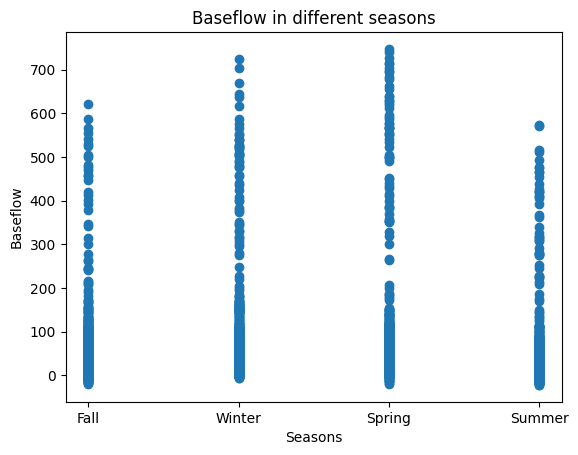

In [450]:
plt.scatter(x="season", y="Observed", data=data)
plt.xlabel("Seasons")
plt.ylabel("Baseflow")
plt.title("Baseflow in different seasons")

##### Looks summer was the most dry one

### Location of Baseflow observed

c:\Users\Sadra\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Text(0.5, 1.0, 'Location')

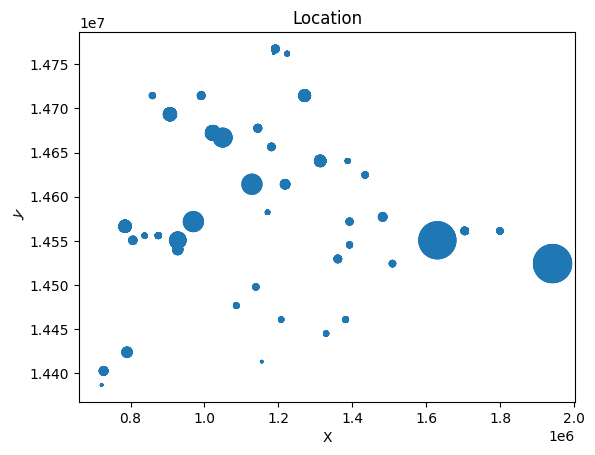

In [451]:
plt.scatter(x="x", y="y", data=data, s=data["Observed"])
plt.xlabel("X")
plt.ylabel("y", rotation=60)
plt.title("Location")

Text(0.5, 1.0, 'Observed Baseflow over Time')

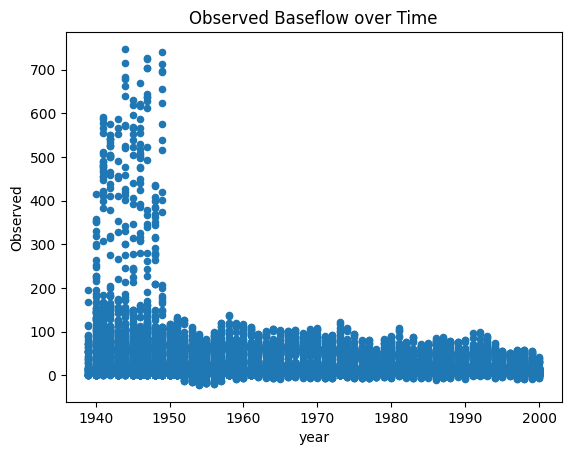

In [452]:
data.plot(kind="scatter", x="year", y="Observed")
plt.title("Observed Baseflow over Time")

In [453]:
segments = data["Segment_id"].unique()
segments

array([144, 154, 176, 171, 152,  55, 118,  65,  64,  63,  40, 135,  53,
       123, 157, 147, 170, 136, 149,  60, 188, 194, 239, 256, 205,  59,
       148, 138,  62,  96, 178, 186, 159, 130,  97,  51, 145, 196, 146,
       189,  56,  98], dtype=int64)

Text(0.5, 1.0, 'Evapotranspiration vs Observed baseflow')

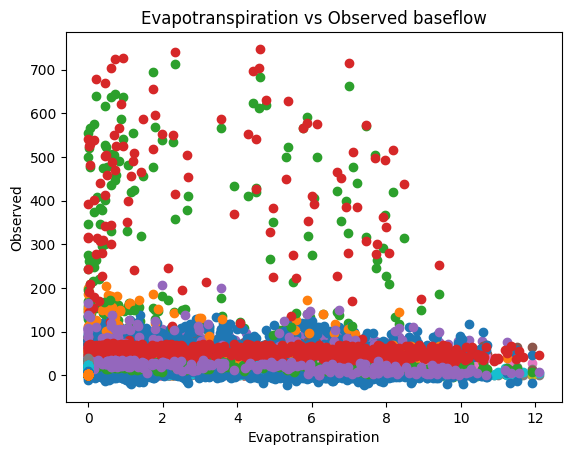

In [454]:
for seg in segments:
    plt.scatter(x=data[data.Segment_id == seg].Evapotranspiration, y=data[data.Segment_id == seg].Observed)
plt.xlabel("Evapotranspiration")
plt.ylabel("Observed")
plt.title("Evapotranspiration vs Observed baseflow")    

##### It does not give us a good view so we have to test it in different segments

Text(0.5, 1.0, 'Precipitation vs Observed baseflow')

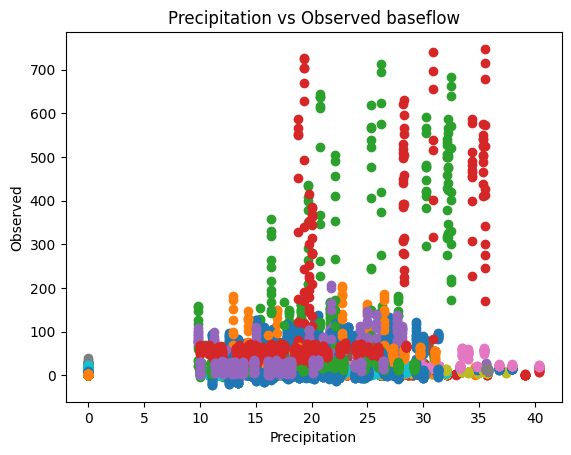

In [455]:
for seg in segments:
    plt.scatter(x=data[data.Segment_id == seg].Precipitation, y=data[data.Segment_id == seg].Observed)
plt.xlabel("Precipitation")
plt.ylabel("Observed")
plt.title("Precipitation vs Observed baseflow")

#### We need to test this one in different segments as well because it does not give us valuable information

### Precipitation over time

Text(0.5, 1.0, 'Precipitation over time')

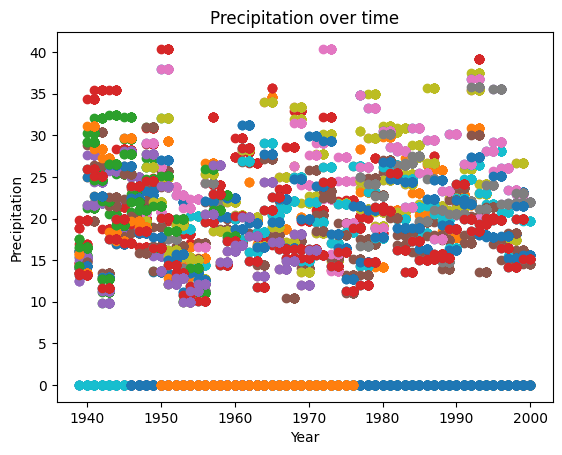

In [456]:
for seg in segments:
    plt.scatter(x=data[data.Segment_id == seg].year, y=data[data.Segment_id == seg].Precipitation)
plt.xlabel("Year")
plt.ylabel("Precipitation")
plt.title("Precipitation over time")

Text(0.5, 1.0, 'Irrigation_pumping vs baseflow')

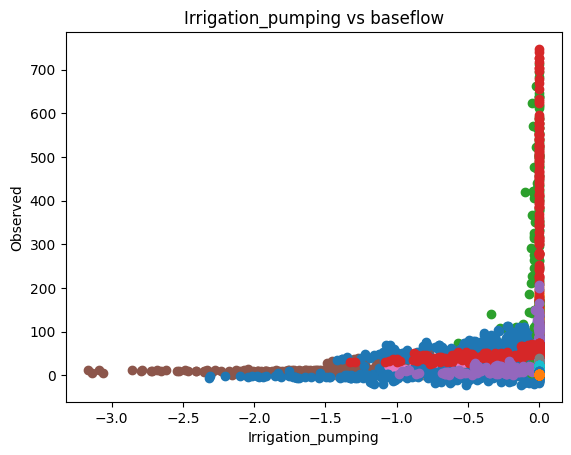

In [457]:
for seg in segments:
    plt.scatter(x=data[data.Segment_id == seg].Irrigation_pumping, y=data[data.Segment_id == seg].Observed)
plt.xlabel("Irrigation_pumping")
plt.ylabel("Observed")
plt.title("Irrigation_pumping vs baseflow")

#### It looks that by increasing irrigation pumping the baseflow decreses but to make sure we will test it in different segments

## Irrigation pumping over time

Text(0.5, 1.0, 'Irrigation_pumping over time')

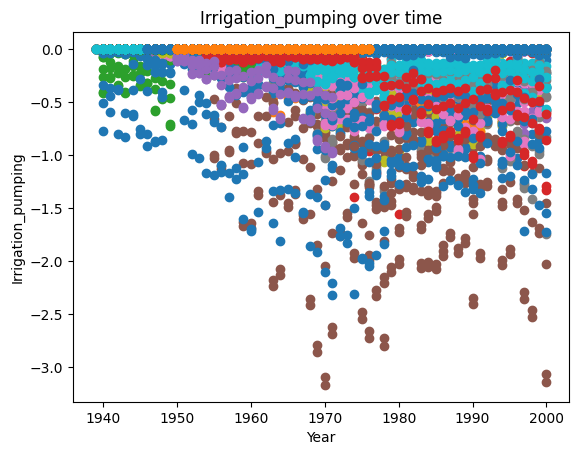

In [458]:
for seg in segments:
    plt.scatter(x=data[data.Segment_id == seg].year, y=data[data.Segment_id == seg].Irrigation_pumping)
plt.xlabel("Year")
plt.ylabel("Irrigation_pumping")
plt.title("Irrigation_pumping over time")

#### Looks pumping increased over the time

#### Seed defined to have the same result from selection in every runs

In [459]:
random_seed = 5
random.seed(random_seed)

### Randomly selected segments to check out the correlations instead of checking all the segments

In [460]:
random_segments = random.sample(list(segments), 12)

#### Check if there is any correlation between randomly selected segments in Evapotranspiration vs observed baseflow

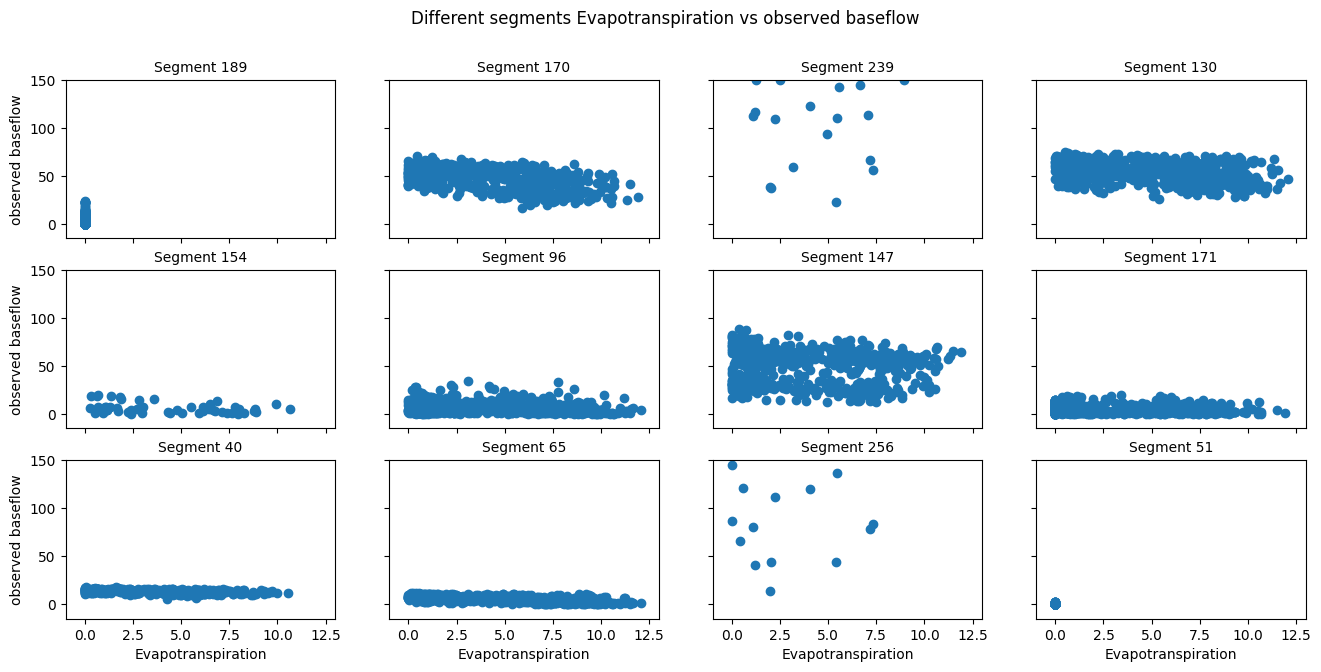

In [461]:
fig, axs = plt.subplots(3, 4, figsize=(16, 7))
j = 0
k = 0
for seg in (random_segments):
    axs[j, k].scatter(x=data[data.Segment_id == seg].Evapotranspiration, y=data[data.Segment_id == seg].Observed)
    axs[j, k].set_title(f"Segment {seg}", fontsize=10)
    axs[j, k].set_xlim(-1, 13)
    axs[j, k].set_ylim(-15, 150)
    k += 1
    if k == 4:
        j += 1
        k = 0
        
for ax in axs.flat:
  ax.set(xlabel="Evapotranspiration", ylabel="observed baseflow")

for ax in fig.get_axes():
  ax.label_outer()
fig.suptitle("Different segments Evapotranspiration vs observed baseflow")
plt.show()

##### Sounds by increasing Evapotranspiration the baseflow decreases

#### Check if there is any correlation between randomly selected segments in Irrigation_pumping vs observed baseflow

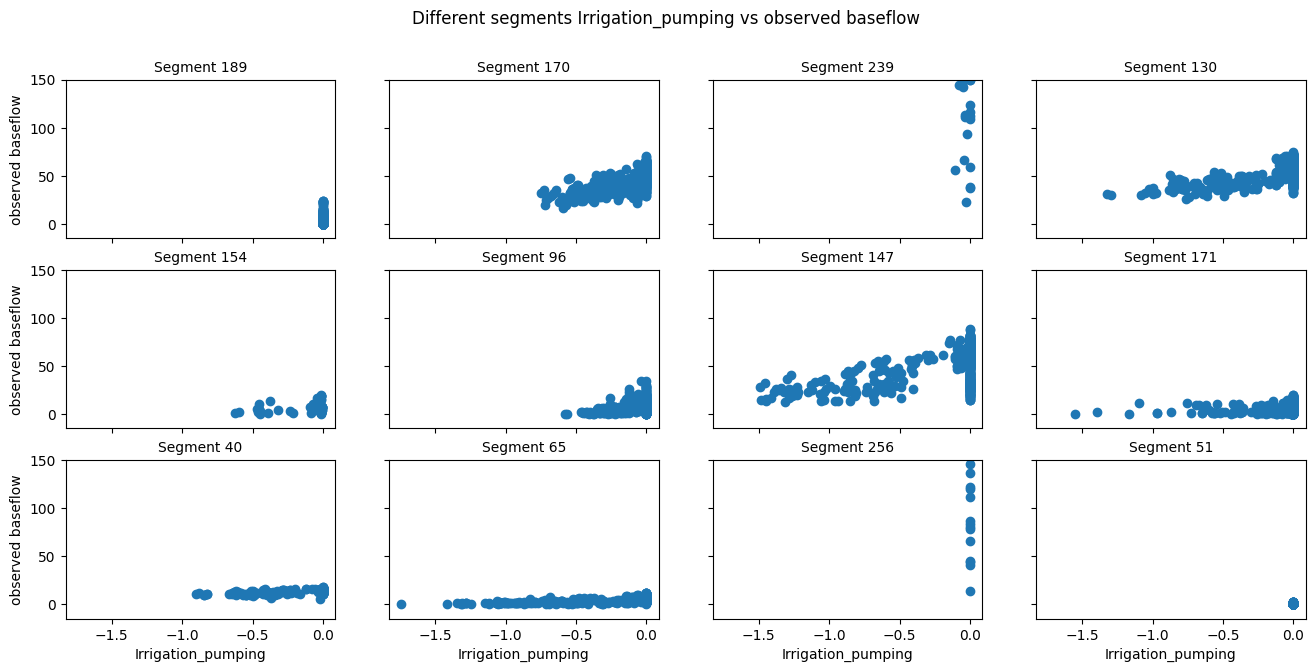

In [462]:
fig, axs = plt.subplots(3, 4, figsize=(16, 7), sharex=True, sharey=True)
j = 0
k = 0
for seg in (random_segments):
    axs[j, k].scatter(x=data[data.Segment_id == seg].Irrigation_pumping, y=data[data.Segment_id == seg].Observed)
    axs[j, k].set_title(f"Segment {seg}", fontsize=10)
    # axs[j, k].set_xlim(-5, 1)
    axs[j, k].set_ylim(-15, 150)
    k += 1
    if k == 4:
        j += 1
        k = 0
        
for ax in axs.flat:
  ax.set(xlabel="Irrigation_pumping", ylabel="observed baseflow")

for ax in fig.get_axes():
  ax.label_outer()
fig.suptitle("Different segments Irrigation_pumping vs observed baseflow")
plt.show()

#### Sounds by increasing (negative value means pumping out here means increasing pumping) irrigation pumping the basefolw decreases

#### Check if there is any correlation between randomly selected segments in Precipitation vs observed baseflow

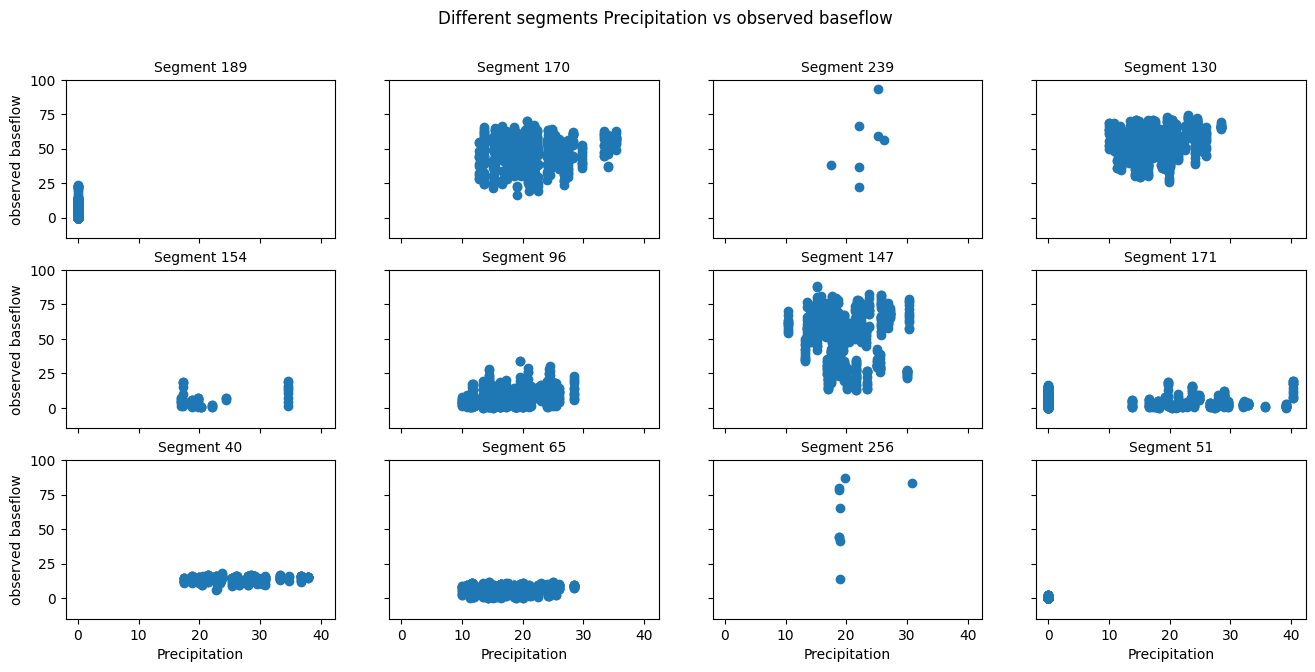

In [463]:
fig, axs = plt.subplots(3, 4, figsize=(16, 7), sharex=True, sharey=True)
j = 0
k = 0
for seg in (random_segments):
    axs[j, k].scatter(x=data[data.Segment_id == seg].Precipitation, y=data[data.Segment_id == seg].Observed)
    axs[j, k].set_title(f"Segment {seg}", fontsize=10)
    axs[j, k].set_ylim(-15, 100)
    k += 1
    if k == 4:
        j += 1
        k = 0
        
for ax in axs.flat:
  ax.set(xlabel="Precipitation", ylabel="observed baseflow")

for ax in fig.get_axes():
  ax.label_outer()
fig.suptitle("Different segments Precipitation vs observed baseflow")
plt.show()

#### It doesn't look to have any correlation between Precipitation and baseflow of these 12 segments

In [464]:
data_for_models

,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed,month,Segment_id_40,Segment_id_51,Segment_id_53,...,Segment_id_189,Segment_id_194,Segment_id_196,Segment_id_205,Segment_id_239,Segment_id_256,season_Fall,season_Spring,season_Summer,season_Winter
0,1086190,14476800,0.59,18.99,0.0,0.145161,11,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1086190,14476800,0.97,29.63,0.0,0.445161,12,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1086190,14476800,1.34,29.63,0.0,1.332203,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1086190,14476800,1.79,29.63,0.0,2.932203,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1086190,14476800,8.23,29.63,0.0,3.728689,3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15586,721870,14387040,0.00,0.00,0.0,0.298500,3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15587,721870,14387040,0.00,0.00,0.0,0.211475,4,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15588,721870,14387040,0.00,0.00,0.0,0.122951,5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15589,721870,14387040,0.00,0.00,0.0,0.120000,6,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Using only Precipitation, Evapotranspiration, and Irrigation_pumping without cross-validation

In [465]:
from statsmodels.api import OLS
lm = smf.ols(formula="Observed ~ Precipitation + Evapotranspiration + Irrigation_pumping", data=data_for_models).fit()
display(f"R-squared: {lm.rsquared}")
display(lm.params)
display(lm.summary())

'R-squared: 0.08265297133218019'

Intercept              3.239849
Precipitation          1.561270
Evapotranspiration    -0.312818
Irrigation_pumping    18.734763
dtype: float64

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Observed   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     468.1
Date:                Tue, 12 Mar 2024   Prob (F-statistic):          2.91e-291
Time:                        03:03:10   Log-Likelihood:                -84285.
No. Observations:               15591   AIC:                         1.686e+05
Df Residuals:                   15587   BIC:                         1.686e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              3.2398      0.758      4.273      0.000       1.754       4.726
Precipitation          1.5613      0.046     34.259      0.000       1.472       1.651
Evapotranspiration    -0.3128      0.172     -1.819      0.069      -0.650       0.024
Irrigation_pumping    18.7348      1.820     10.292      0.000      15.167      22.303
==============================================================================
Omnibus:                    19537.333   Durbin-Watson:                   0.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2745873.800
Skew:                           6.987   Prob(JB):                         0.00
Kurtosis:                      66.495   Cond. No.                         78.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### As we see the R-squared is too low and it means the features are not enough for it

## Creating Linear Regression model and applying 10-fold cross-validation

In [466]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

model = LinearRegression()

kf = KFold(n_splits=10, shuffle=True, random_state=42)

X = data_for_models.drop(columns=["Observed"])
y = data_for_models["Observed"]

intercepts = []
coefficients = []
mse_scores = []
r_squared = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Compute mean squared error on the test data
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    
    # Store intercept and coefficients
    intercepts.append(model.intercept_)
    # coefficients.append(model.coef_)
    r_squared.append(r2_score(y_test, y_pred))
    # print(r2_score(y_test, y_pred))
    
    # break

# Convert lists to numpy arrays for easier manipulation
intercepts = np.array(intercepts)
# coefficients = np.array(coefficients)

# Print mean and standard deviation of mean squared error scores
print("Mean CV R-Squared:", np.mean(r_squared))
print("Mean CV MSE:", np.mean(mse_scores))

# Print mean and standard deviation of intercepts and coefficients
print("Mean Intercept:", np.mean(intercepts))
# print("Mean Coefficients:", np.mean(coefficients))

Mean CV R-Squared: 0.8061854772076913
Mean CV MSE: 591.4275484540999
Mean Intercept: 10625.638840071331
